In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the file emails.csv

In [2]:
df = pd.read_csv("emails.csv")

Display some data

In [3]:
df.head(3)

,email,rec,elen,attch,slen,spam
0,eli302@outlook.com,10,235,1,35,1
1,eli194@outlook.com,3,211,1,19,0
2,eli415@me.com,17,232,1,69,1


Use describe to see some stats

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rec,1715.0,4.995335,5.070101,1.0,2.0,4.0,5.0,24.0
elen,1715.0,168.602915,153.152677,2.0,88.5,144.0,206.0,1089.0
attch,1715.0,0.514869,0.499925,0.0,0.0,1.0,1.0,1.0
slen,1715.0,16.709038,8.348653,10.0,12.0,15.0,18.0,70.0
spam,1715.0,0.268805,0.443467,0.0,0.0,0.0,1.0,1.0


How many spam emails we have?

In [12]:
df.spam.value_counts()

0    1254
1     461
Name: spam, dtype: int64

Use countplot to see how many ham/spam

<AxesSubplot:xlabel='spam', ylabel='count'>

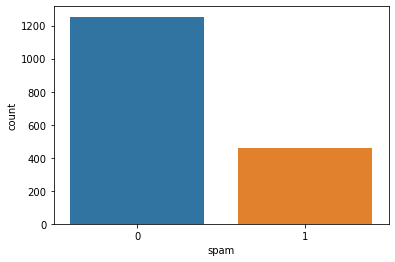

In [13]:
sns.countplot(data=df, x="spam")

Use distplot to see the email len distribution

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='elen'>

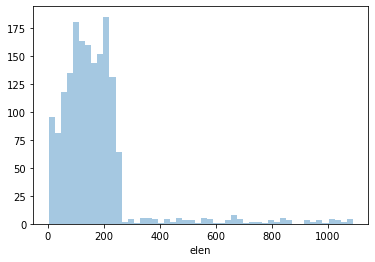

In [14]:
sns.distplot(df.elen,kde=False)

How many emails with len > 245 are spam?

In [17]:
df[df.elen > 245].spam.value_counts().

1    113
0     31
Name: spam, dtype: int64

Use countplot to see if there is any relation between attachment and spam

<AxesSubplot:xlabel='rec', ylabel='count'>

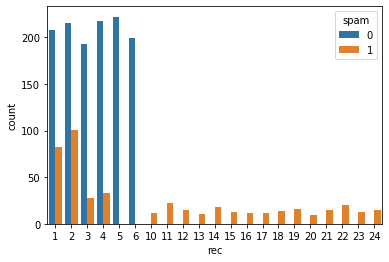

In [20]:
sns.countplot(data=df, hue="spam", x="rec")

Use countplot to see if there is any relation between number of rec. and spam

In [ ]:
sns.countplot(data=df, hue="spam", x="attch")

build the model, split to train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df.head(2)

,email,rec,elen,attch,slen,spam
0,eli302@outlook.com,10,235,1,35,1
1,eli194@outlook.com,3,211,1,19,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['email','spam'],axis=1), df['spam'], test_size=0.33, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

Create a classification report

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       404
           1       1.00      0.55      0.71       162

    accuracy                           0.87       566
   macro avg       0.92      0.77      0.81       566
weighted avg       0.89      0.87      0.86       566



Create a confusion matrix

In [32]:
confusion_matrix(y_test,pred)

array([[404,   0],
       [ 73,  89]], dtype=int64)

Check if email with 3 rec, len=59, no attachment and subject len=14 is a spam

In [33]:
X_train.head(1)

,rec,elen,attch,slen
1329,4,11,0,14


In [34]:
model.predict(np.array([3,59,0,14]).reshape(1,-1))

array([0], dtype=int64)

Check if email with 12 rec, len=159, no attachment and subject len=24 is a spam

In [35]:
model.predict(np.array([12,159,0,24]).reshape(1,-1))

array([1], dtype=int64)